## CNN - Movie Genre Classification

CST - 435 <br>
Grand Canyon University<br>
Created By: Caleb Klinger, Kyungchan Im<br>
Professor: Isac Artzi

We are going to perform a Convolutionary Neural Network to predict the genre based off from the poster image. <br> We will perform image classification by training the model by its categories. This dataset is from Kaggle, but originally from 

Wei-Ta Chu and Hung-Jui Guo, “Movie Genre Classification based on Poster Images with Deep Neural Networks,” Proceedings of International Workshop on Multimodal Understanding of Social, Affective and Subjective Attributes, pp. 39-45, 2017. (in conjunction with ACM Multimedia 2017).

### Import Necessary Packages
---

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array

In [3]:
# Download dataset on https://www.kaggle.com/datasets/raman77768/movie-classifier

# Load the dataset
movies = pd.read_csv('movie_dataset/train.csv') # Dataset containing genres with movie poster IDs

In [4]:
# Check the basic information of the dataset
movies.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Normalizing Dataset

In [5]:
X = [] # Image data
# movies.shape[0] = number of iteration required to convert all pictures to numpy array

# Normalizing the images to pixel values
for i in tqdm(range(movies.shape[0])):
    path = 'movie_dataset/Images/' + movies['Id'][i] + '.jpg'

    # Load the image and resize it to 350x350 pixels
    image = load_img(path, target_size=(350,350,3))

    # Convert the image to array
    image_array = img_to_array(image)

    # Normalize the image
    image_array = image_array/255

    # Append the image to the list
    X.append(np.array(image_array))

# Convert the list to numpy array
X = np.array(X)

  0%|          | 0/7254 [00:00<?, ?it/s]

100%|██████████| 7254/7254 [00:10<00:00, 677.45it/s]


In [6]:
X.shape

(7254, 350, 350, 3)

In [7]:
movies.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [8]:
y = movies.drop(['Id','Genre'],axis=1)
y = y.to_numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=17)

In [11]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(25,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 346, 346, 16)      1216      
                                                                 
 batch_normalization (Batch  (None, 346, 346, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 173, 173, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 173, 173, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 169, 169, 32)      12832     
                                                                 
 batch_normalization_1 (Bat  (None, 169, 169, 32)      1

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

epochs = 10

In [14]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/10
182/182 [==============================] - 383s 2s/step - loss: 0.6424 - accuracy: 0.1130 - val_loss: 0.3832 - val_accuracy: 0.0338
Epoch 2/10
182/182 [==============================] - 380s 2s/step - loss: 0.2999 - accuracy: 0.2718 - val_loss: 0.2460 - val_accuracy: 0.2226
Epoch 3/10
182/182 [==============================] - 387s 2s/step - loss: 0.2497 - accuracy: 0.3090 - val_loss: 0.2370 - val_accuracy: 0.3280
Epoch 4/10
182/182 [==============================] - 387s 2s/step - loss: 0.2415 - accuracy: 0.3193 - val_loss: 0.2405 - val_accuracy: 0.2874
Epoch 5/10
182/182 [==============================] - 382s 2s/step - loss: 0.2379 - accuracy: 0.3264 - val_loss: 0.2354 - val_accuracy: 0.2391
Epoch 6/10
182/182 [==============================] - 386s 2s/step - loss: 0.2353 - accuracy: 0.3384 - val_loss: 0.2340 - val_accuracy: 0.3666
Epoch 7/10
182/182 [==============================] - 392s 2s/step - loss: 0.2312 - accuracy: 0.3438 - val_loss: 0.2332 - val_accuracy: 0.2529

In [15]:
model.save('movie_classifier.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.2350158840417862
Test accuracy:  0.31702274084091187


1/1 [==============================] - 0s 32ms/step
Drama
Romance
Comedy


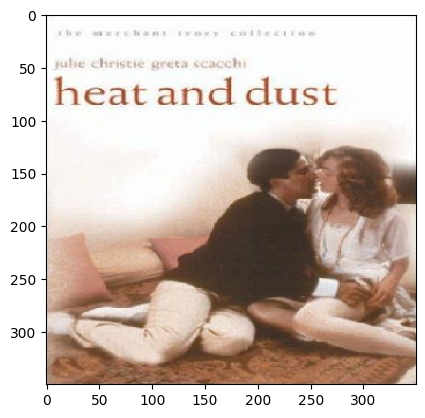

In [47]:
img = load_img('movie_dataset/Images/tt0084058.jpg',target_size=(350,350,3))
plt.imshow(img)
img = img_to_array(img)
img = img/255.0
img = img.reshape(1,350,350,3)
classes = movies.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
    print(classes[top3[i]])

In [48]:
movies[movies['Id'] == 'tt0084058']

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
98,tt0084058,"['Drama', 'Romance']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
